# CNN for Sequences
we'll discuss how to use CNN for sequences specifically texts, but what we say works on other types of sequences as well.
- recall convolution: the prof also calls it correlation
- in image we have two dimensions (width and height): these are the dimensions that are useful for correlation.
- if a pixel is red, the neighboring pixels are also red (correlated) so likely to have similar values

- now think of a seq:
- a sequence has only one non-feature dimension : time
- the same type of correlation also appears in sequences
- data which are nearby in time are also similar in value (no jumping)

Luckily convolution in 1-d is actually more simple than convolution in 2-d:
- slide the filter along every position, multiply and add
- Example:
    - input sequence: 1 2 3 2 1
    - filter: 1 -1
    - output: -1 -1 1 1 #birer kaydırıp buldum doğru
- remember: mathematicians and statisticians would call these cross-correlations
#### 1-D Convolution with features:
- Input is TxD, T: number of steps, D: number of input features
- Putput is TxM, M: number of output features
- so W (the filter) has the shape T'x D x M (where T' << T)
- For images : 2 spatial dimensions + 1 input feature dimension + 1 output feature dimension
- For sequences: 1 time dimension + 1 input feature dimension + 1 output feature dimension

### Convolution on Text
- we use embeddings to give us what we need!
- For 1-D convolution we need TxD input
- That's exactly what we get when we use embedding on a sequence of words with length T!


- Generally speaking, when we keep adding conv-pooling, data shrinks in time dimension but increase in feature dimension
- so that's why you see number of feature maps getting laarger and larger: 32-64-128 bunlar feature maps sayısıymış..
- once done, we can apply flattening or global max pooling which will give us a single vector of size M3

#### 32-64-128 olayını pek anlamadım. 

## Exercise : Text Classification using a CNN

In [1]:
# https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-06-17 14:41:10--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: 'bbc_text_cls.csv'

bbc_text_cls.csv    100%[===================>]   4.85M  1.97MB/s    in 2.5s    

2023-06-17 14:41:17 (1.97 MB/s) - 'bbc_text_cls.csv' saved [5085081/5085081]



In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

2023-06-17 14:41:24.542167: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business

In [4]:
df['targets'] = df['labels'].astype("category").cat.codes

In [5]:
# number of classes
K = df['targets'].max() + 1
K

5

In [6]:
df_train, df_test = train_test_split(df, test_size=0.3)

In [7]:
# Convert sentences to sequences
# we're not using tfidf we'll represent each doc as a list of integers
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [15]:
sequences_train

[[1034,
  61,
  88,
  1434,
  5,
  686,
  45,
  199,
  1612,
  938,
  25,
  524,
  4,
  1,
  2,
  138,
  79,
  166,
  1486,
  548,
  20,
  1,
  313,
  105,
  497,
  18,
  1,
  1034,
  50,
  71,
  1486,
  88,
  8,
  241,
  26,
  239,
  16,
  1,
  1561,
  1486,
  87,
  5,
  1561,
  495,
  38,
  6,
  32,
  214,
  4,
  1035,
  2,
  655,
  88,
  1,
  1561,
  1486,
  1408,
  2,
  1878,
  97,
  5,
  736,
  3,
  655,
  88,
  9,
  87,
  844,
  124,
  277,
  22,
  1,
  25,
  760,
  88,
  4,
  71,
  46,
  22,
  490,
  87,
  67,
  277,
  9,
  27,
  204,
  1134,
  81,
  2,
  89,
  11,
  10,
  1,
  88,
  212,
  1699,
  88,
  25,
  122,
  1116,
  93,
  112,
  46,
  204,
  609,
  91,
  495,
  664,
  2,
  76,
  16,
  48,
  27,
  204,
  609,
  91,
  1486,
  80,
  38,
  24,
  1434,
  402,
  54,
  105,
  92,
  1168,
  54,
  24,
  1,
  9,
  895,
  31,
  1486,
  88,
  99,
  87,
  55,
  5,
  1293,
  6,
  1,
  20,
  1,
  167,
  3,
  1,
  203,
  87,
  26,
  239,
  60,
  1434,
  8,
  1,
  481,
  9,
  30,
  609,

In [2]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

NameError: name 'tokenizer' is not defined

In [1]:
word2idx

NameError: name 'word2idx' is not defined

In [9]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (1557, 3485)


In [10]:
data_test = pad_sequences(sequences_test, maxlen=T) #notice we set the maxlen to T.
#this is how we do when you deal with data in real world since we don't know the length of any future data we wanna
# use our model on. EE ya böyle text kaybedersek?
print('Shape of data test tensor:', data_test.shape)

## ee bunların lengthleri farklı 

Shape of data test tensor: (668, 3485)


In [11]:
# Create the model

# We get to choose embedding dimensionality
D = 50 #you can change it as an exercise

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index (in the embedding matrix??) starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

### ee daha önce niye bunu yapmadık

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(64, 3, activation='relu')(x)
# x = MaxPooling1D(3)(x)
# x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In the given code snippet, 32 refers to the number of filters in the Conv1D layer.

In the context of a 1D convolutional neural network (CNN), the number of filters represents the number of feature maps or channels that are generated by the convolution operation. Each filter in the convolutional layer performs a separate convolution operation on the input data, resulting in a corresponding feature map.

In this case, the Conv1D layer has 32 filters, which means that it will produce 32 output feature maps. Each feature map represents a different learned aspect or pattern captured by the filters.

By increasing or decreasing the number of filters, you can control the capacity and complexity of the convolutional layer. More filters can potentially capture more detailed patterns in the input data, but it also increases the number of parameters and computational requirements. The choice of the number of filters depends on the specific problem, dataset, and the complexity of the patterns you want the model to capture.

#### 1 filter is 1 weight vector,32 filters is 32 weight vector, each of which produce a different output, learn a different feature on the input. then we flatten all these learned info and apply a dense layer to gives us the solution

In [12]:
# Compile and fit
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  df_train['targets'],
  epochs=10,
  validation_data=(data_test, df_test['targets'])
)

Training model...
Epoch 1/50
49/49 [==============================] - 9s 175ms/step - loss: 1.5739 - accuracy: 0.2556 - val_loss: 1.5013 - val_accuracy: 0.3698
Epoch 2/50
49/49 [==============================] - 9s 186ms/step - loss: 1.3655 - accuracy: 0.6827 - val_loss: 1.2131 - val_accuracy: 0.8174
Epoch 3/50
49/49 [==============================] - 9s 193ms/step - loss: 0.9410 - accuracy: 0.8921 - val_loss: 0.7205 - val_accuracy: 0.9251
Epoch 4/50
49/49 [==============================] - 12s 238ms/step - loss: 0.4863 - accuracy: 0.9390 - val_loss: 0.3930 - val_accuracy: 0.9371
Epoch 5/50
49/49 [==============================] - 11s 223ms/step - loss: 0.2689 - accuracy: 0.9518 - val_loss: 0.2689 - val_accuracy: 0.9416
Epoch 6/50
49/49 [==============================] - 11s 225ms/step - loss: 0.1818 - accuracy: 0.9634 - val_loss: 0.2130 - val_accuracy: 0.9506
Epoch 7/50
49/49 [==============================] - 11s 223ms/step - loss: 0.1333 - accuracy: 0.9756 - val_loss: 0.1818 - val_a

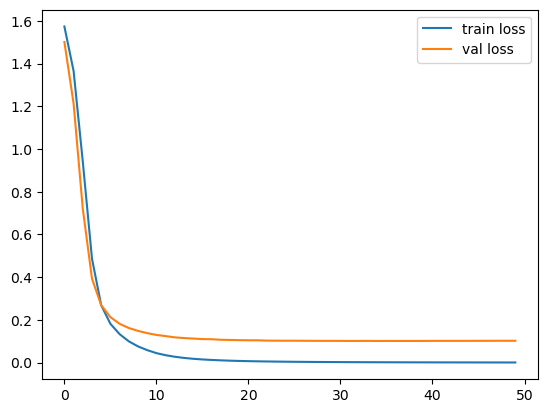

In [13]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

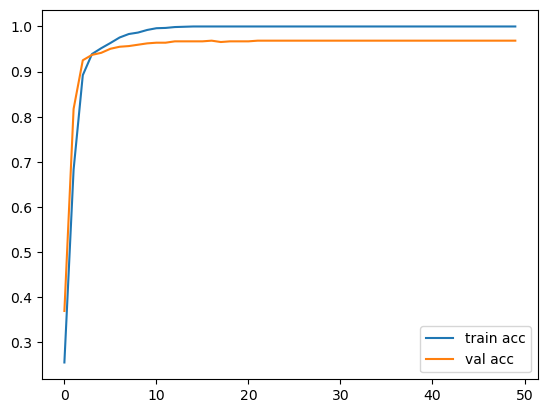

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

### Exercise:
- compute other metrics like AUC and F-1
- compare this results with results from other exercises
- modify hyperparameters to improve results
- yahu bi de tek bi sequence seçip onu predict ettirmeyi öğrenemez miydik?